In [1]:
from keras.datasets import mnist
(X_train,y_train),(X_test,y_test)=mnist.load_data()

Using TensorFlow backend.


In [2]:
import numpy as np
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

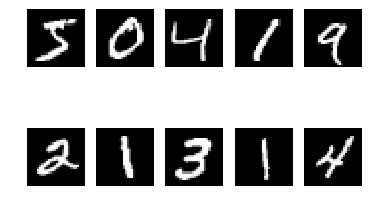

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(X_train[i,:,:],cmap='gray')
    plt.axis('off')

In [6]:
from sklearn.preprocessing import OneHotEncoder
enc=OneHotEncoder(sparse=False,dtype=np.float32)
y_train_pre=enc.fit_transform(y_train.reshape(-1,1))

C:\Users\Paul\Anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\preprocessing\_encoders.py:363: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [10]:
X_train_pre=X_train.reshape((X_train.shape[0],-1))
X_train_pre=X_train_pre.astype(np.float32)/255.0
X_test_pre=X_test.reshape((X_test.shape[0],-1))
X_test_pre=X_test_pre.astype(np.float32)/255.0

In [11]:
import cv2
mlp=cv2.ml.ANN_MLP_create()

In [12]:
mlp.setLayerSizes(np.array([784,512,512,10]))
mlp.setActivationFunction(cv2.ml.ANN_MLP_SIGMOID_SYM,2.5,1.0)
mlp.setTrainMethod(cv2.ml.ANN_MLP_BACKPROP)
mlp.setBackpropWeightScale(0.00001)

In [13]:
term_mode = (cv2.TERM_CRITERIA_MAX_ITER +cv2.TERM_CRITERIA_EPS)
term_max_iter = 10
term_eps = 0.01
mlp.setTermCriteria((term_mode, term_max_iter,term_eps))

In [14]:
mlp.train(X_train_pre, cv2.ml.ROW_SAMPLE, y_train_pre)

True

In [15]:
_, y_hat_train = mlp.predict(X_train_pre)
from sklearn.metrics import accuracy_score
accuracy_score(y_hat_train.round(), y_train_pre)

0.8539166666666667

In [24]:
_, y_hat_test = mlp.predict(X_test_pre)
y_test_pre = enc.fit_transform(y_test.reshape(-1, 1))
accuracy_score(y_hat_test.round(), y_test_pre)

C:\Users\Paul\Anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\preprocessing\_encoders.py:363: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


0.8488